<a href="https://colab.research.google.com/github/ghousiya47/Project-1/blob/main/restaurant_reviews_sentimental_analysis_by_ghousiya_begum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [595]:
#step 1: import model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from numpy import math
warnings.filterwarnings('ignore')

In [596]:
#step 2: load datasets
df = pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv", delimiter='\t', quoting=3)


In [597]:
#prints out first 5 row of df
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [598]:
df.head().T
#changes configuration of table

,0,1,2,3,4
Review,Wow... Loved this place.,Crust is not good.,Not tasty and the texture was just nasty.,Stopped by during the late May bank holiday of...,The selection on the menu was great and so wer...
Liked,1,0,0,1,1


In [599]:
df.shape
#decribes the dimension of dataframe

(1000, 2)

In [600]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [601]:
df['Liked'].value_counts()


1    500
0    500
Name: Liked, dtype: int64

In [602]:
df['Liked'].describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

In [603]:
df['length']=df['Review'].apply(len)
#creating a new column called 'length' which gives length of each review

In [604]:
df.head()


,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [605]:
df.length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

In [606]:
#lets see what's the review with maximum characters i.e 149 which we got from above
df[df['length']==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [607]:
#step 3:clean data by removing punctuations and stopwords
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [608]:
#lets print list of all stopwords of english language
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [609]:
#you can try with some other languages like french and german
stopwords.words('german')

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [610]:
#lets print all punctuations
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [611]:
#lets create a new function which removes punctuation n stopwords
def text_process(msg):
  nopunc = [char for char in msg if char not in string.punctuation] #keep only thoose characters which are not punctuation
  nopunc = ''.join(nopunc)    #converts characters back to word
  return ' '.join([word for word in nopunc.split() if word.lower() not in set(stopwords.words('english'))])   #keep only those words which are not stopwords

note:

nopunc = ''.join

 {here there is no space because we are joining characters to form word}

return ' '.join

 {here we have included space between single quote because we are joining words to form review hence space should be included}

In [612]:
#lets create a new column which is review part without ctopwords and punctuation
df['new_review']=df['Review'].apply(text_process)

In [613]:
df.head()

,Review,Liked,length,new_review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


In [614]:
#generate word cloud
from wordcloud import WordCloud


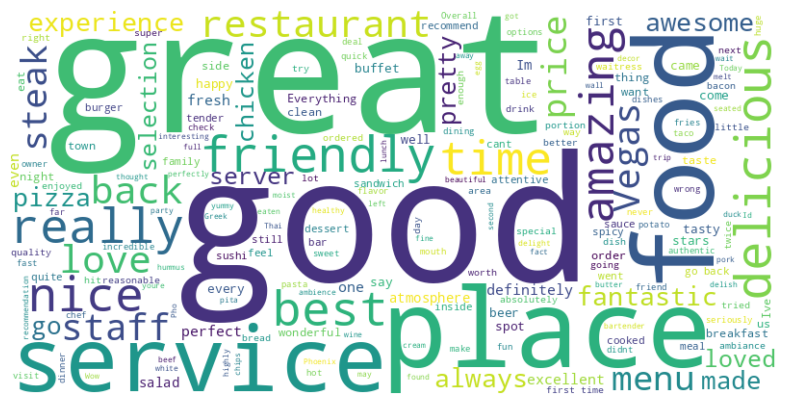

In [615]:
#positive comment wordcloud
word_cloud=df.loc[df['Liked']==1,:]
#create wordcloud for only positive comments
text = ' '.join([text for text in word_cloud['new_review']])
wrdcld = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize = (10,5))
plt.imshow(wrdcld, interpolation = 'bilinear')
plt.axis('off')
plt.show()


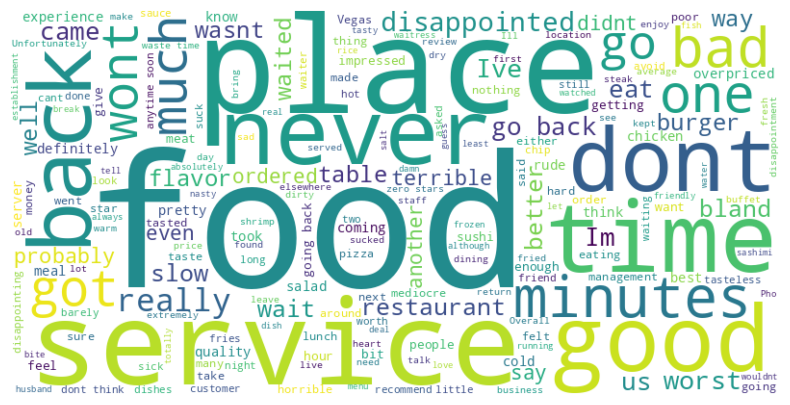

In [616]:
#negative reviews
word_cloud=df.loc[df['Liked']==0,:] #create wordcloud for only positive comments
text = ' '.join([text for text in word_cloud['new_review']])
wrdcld = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize = (10,5))
plt.imshow(wrdcld, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [617]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


CountVectorizer:

Counts the frequency of each word (token) in a document.
Represents text data as a matrix of word counts.
Tends to work well when you want to capture the importance of words based on their frequency alone.
Does not consider the importance of words in the entire corpus; it treats all words equally in terms of importance.

TfidfVectorizer:

Uses the TF-IDF (Term Frequency-Inverse Document Frequency) metric to represent the importance of words in a document relative to a collection of documents (corpus).
Considers not only the frequency of a word in a document but also how unique that word is across all documents.
Typically, TF-IDF is more suitable when you want to give higher importance to words that are specific to certain documents but not common across all documents.
Helps reduce the impact of common words (stopwords) that might appear frequently but are not informative for classification tasks.
TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
IDF(t) = log_e(Total number of documents / Number of documents with term t in it)
TF-IDF = TF(tt)*IDF(t)
where term t refers to words, and documents here refer to rows.

here we are using countvectorizer we can also use tfidvectorizer

In [618]:
#here we are using naive bayes algorithm
vectorizer = CountVectorizer(max_df=0.99, min_df=1)
X = vectorizer.fit_transform(df['new_review']).toarray()


fit_transform method takes the "new_review" column of your DataFrame df and converts it into a document-term matrix where rows represent documents (reviews) and columns represent unique words (tokens) in the text.

toarray() converts the sparse matrix returned by fit_transform into a dense NumPy array. This array X contains the vectorized representation of your text data.

we can use different value of max_df and min_df to get better accuracy

for example: if you set max_df=0.85, words that appear in more than 85% of the documents will be ignored as they are considered too common to be informative for your specific task.

For example, if you set min_df=2, words that appear in fewer than 2 documents will be ignored. If you set min_df=0.1, it means words must appear in at least 10% of the documents to be included.

In [619]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [620]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['new_review'],df['Liked'],random_state=107, test_size= 0.5)

random_state:

The random_state parameter is used to set the random seed for the random number generator. It ensures that the data splitting process is reproducible. When you set random_state to a specific integer (e.g., 42), you ensure that every time you run your code with the same random_state value, you'll get the same split of data. This is useful for reproducibility and debugging.
The choice of random_state doesn't impact the actual model training. It only affects how the data is shuffled and then split into training and testing sets. If you don't set random_state, the data split will be different each time you run your code.

In [621]:
X_train.head()

527    sure order dessert even need pack togo tiramis...
795    good going review place twice hereas tribute p...
2                                    tasty texture nasty
741                                            way fried
661                         convenient since staying MGM
Name: new_review, dtype: object

In [622]:
train_vectorized= vectorizer.transform(X_train)
test_vectorized= vectorizer.transform(X_test)

In [623]:
X_train_array = train_vectorized.toarray()
X_test_array = test_vectorized.toarray()
X_test_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

vectorizer.transform(X_train) applies the CountVectorizer you initialized earlier to the training data. It converts the text data in X_train into a document-term matrix representation, where each row corresponds to a document (in this case, a text review), and each column represents the count of words in that document.
The result, train_vectorized, is a sparse matrix where each row corresponds to a review in your training data, and each column represents a unique word in your dataset.
Using the Vectorized Training Data:

train_vectorized can be used as input to train a machine learning model, such as a classifier like Multinomial Naive Bayes, which can learn to classify the sentiment of the reviews based on these vectorized representations.

In [624]:
#here we are using naive bayes algorithm (guassian method)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB() #Creates model
nb.fit(X_train_array, y_train)
#initialize and trains guassian naive bayes model


GaussianNB()

In [625]:
#lets make predictions
#we use trained guassian naive bayes model to make predictions on test data and also if you want train data
y_train_preds_nb = nb.predict(X_train_array)
y_test_preds_nb = nb.predict(X_test_array)

In [626]:
y_test

906    0
24     1
706    1
958    0
355    1
      ..
239    1
972    0
771    1
673    1
525    0
Name: Liked, Length: 500, dtype: int64

In [627]:
y_test_preds_nb

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [628]:
pd.DataFrame({'actual_y_value':y_test, "predicted_y_value":y_test_preds_nb})

,actual_y_value,predicted_y_value
906,0,0
24,1,1
706,1,1
958,0,0
355,1,1
...,...,...
239,1,1
972,0,0
771,1,1
673,1,1


In [629]:
#lets check accuracy and all
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,  roc_auc_score, classification_report, confusion_matrix, roc_curve, auc


In [630]:
def print_metrics(actual,predicted):
  print("accuracy score is")
  print("accuracy score is {}".format(accuracy_score(actual, predicted)))
  print(" precision score is {}".format( precision_score(actual, predicted)))
  print("recall score is {}".format(recall_score(actual, predicted)))
  print("f1 score is {}".format(f1_score(actual, predicted)))
  print("roc auc score is {}".format( roc_auc_score(actual, predicted)))
  print("confusion matrix is {}".format(confusion_matrix(actual, predicted)))
  print("classification report is {}".format(classification_report(actual, predicted)))


In [631]:
#evaluation of training model
print_metrics(y_train, y_train_preds_nb)


accuracy score is
accuracy score is 0.964
 precision score is 0.9333333333333333
recall score is 1.0
f1 score is 0.9655172413793104
roc auc score is 0.9637096774193548
confusion matrix is [[230  18]
 [  0 252]]
classification report is               precision    recall  f1-score   support

           0       1.00      0.93      0.96       248
           1       0.93      1.00      0.97       252

    accuracy                           0.96       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.97      0.96      0.96       500

